In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error,accuracy_score

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer , make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

In [122]:
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier

In [5]:
df = pd.read_csv("bank.csv", delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


   ## Description:
   The data is related with direct marketing campaigns of a Portuguese banking institution.<br/> 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,<br/> 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
for col in df:
    print(df[col].unique())

[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
[ 2143    29     2 ...  8205 14204 16353]
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[ 261  151   76 ... 1298 1246 1556]
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
[ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
types_of_feature = pd.Series(index=df.columns)

types_of_feature.age = "numerical - discrete"
types_of_feature.job = "categorical - nominal"
types_of_feature.marital = "categorical - nominal"
types_of_feature.education  = "categorical - nominal"
types_of_feature.default = "categorical - binary"
types_of_feature.balance = "numerical - discrete"
types_of_feature.housing = "categorical - binary"
types_of_feature.loan = "categorical - binary"
types_of_feature.contact = "categorical - nominal"
types_of_feature.day = "numerical - discrete"
types_of_feature.month = "categorical - nominal"
types_of_feature.duration = "numerical - discrete"
types_of_feature.campaign = "numerical - discrete"
types_of_feature.pdays = "numerical - discrete"
types_of_feature.previous = "numerical - discrete"
types_of_feature.poutcome = "categorical - nominal"
types_of_feature.drop('y',inplace=True)
types_of_feature

age           numerical - discrete
job          categorical - nominal
marital      categorical - nominal
education    categorical - nominal
default       categorical - binary
balance       numerical - discrete
housing       categorical - binary
loan          categorical - binary
contact      categorical - nominal
day           numerical - discrete
month        categorical - nominal
duration      numerical - discrete
campaign      numerical - discrete
pdays         numerical - discrete
previous      numerical - discrete
poutcome     categorical - nominal
dtype: object

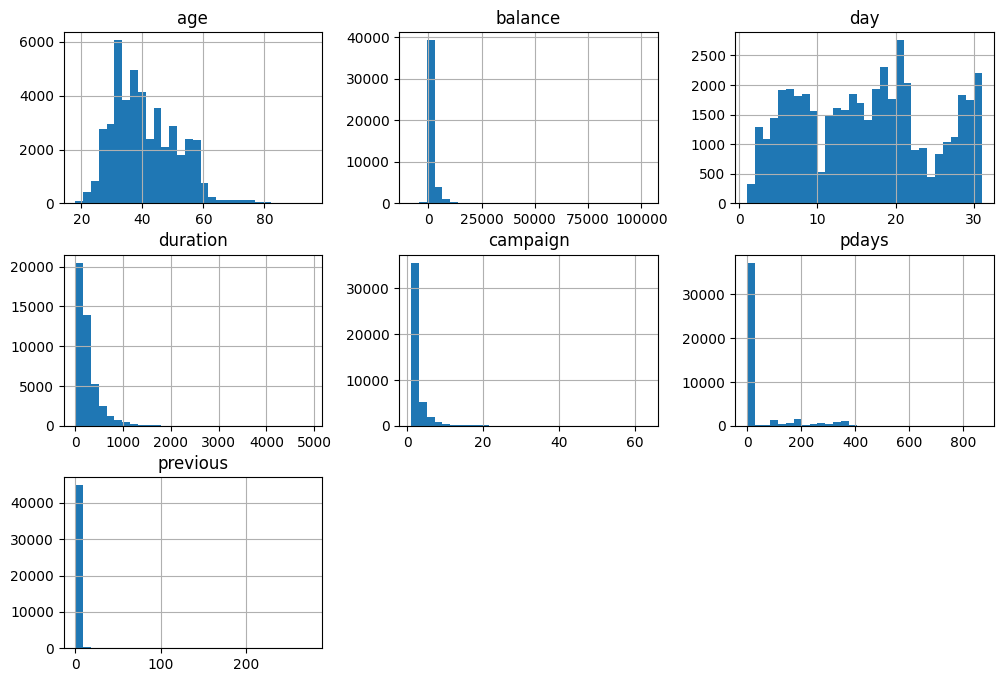

In [11]:
df.hist(bins=30, figsize=(12,8))
plt.show()

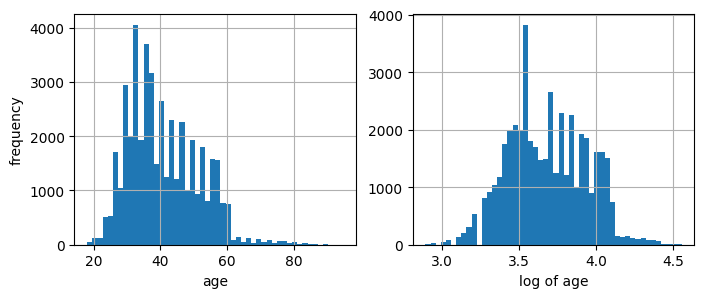

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=False)
df.age.hist(ax=axs[0], bins=50)
df.age.apply(lambda x: np.log(x)).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("age")
axs[1].set_xlabel("log of age")
axs[0].set_ylabel("frequency")
plt.show()

In [13]:
df.duration.nunique()

1573

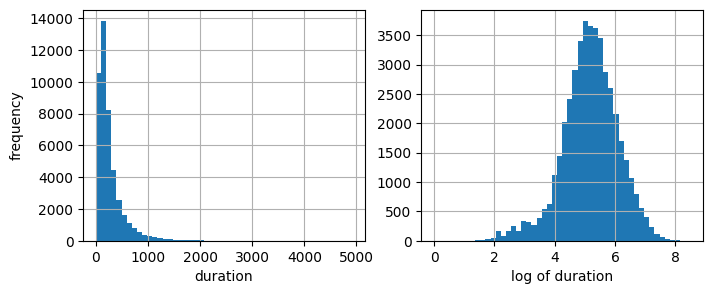

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=False)
df.duration.hist(ax=axs[0], bins=50)
df.duration.map(np.log1p).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("duration")
axs[1].set_xlabel("log of duration")
axs[0].set_ylabel("frequency")
plt.show()

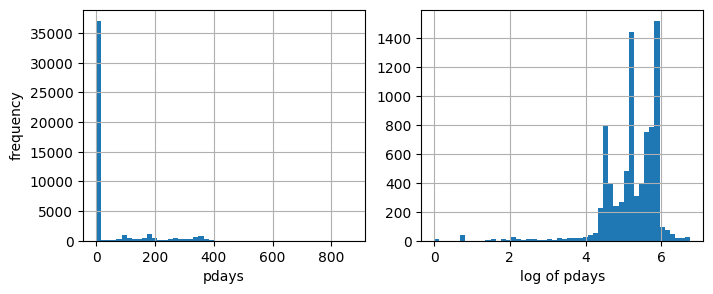

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=False)
df.pdays.hist(ax=axs[0], bins=50)
df.pdays.apply(lambda x: np.log(x)).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("pdays")
axs[1].set_xlabel("log of pdays")
axs[0].set_ylabel("frequency")
plt.show()

<Axes: >

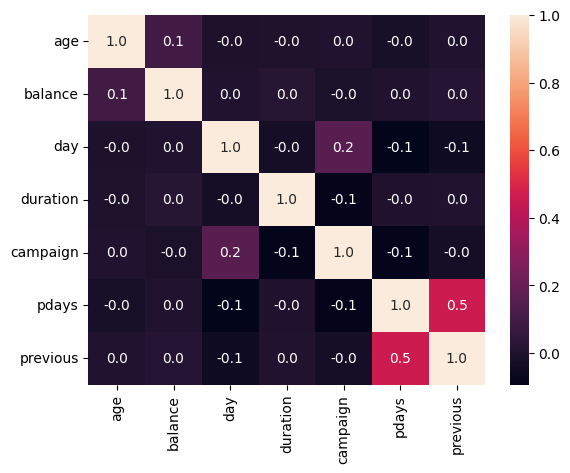

In [16]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f")

In [17]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [18]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [19]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [20]:
df.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [21]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

## preproccessing

In [22]:
types_of_feature

age           numerical - discrete
job          categorical - nominal
marital      categorical - nominal
education    categorical - nominal
default       categorical - binary
balance       numerical - discrete
housing       categorical - binary
loan          categorical - binary
contact      categorical - nominal
day           numerical - discrete
month        categorical - nominal
duration      numerical - discrete
campaign      numerical - discrete
pdays         numerical - discrete
previous      numerical - discrete
poutcome     categorical - nominal
dtype: object

### senario 1

In [23]:
cat_pipeline1 = make_pipeline(OneHotEncoder(handle_unknown="ignore"))
num_pipeline1 = make_pipeline(StandardScaler())
binary_pipeline1 = make_pipeline(OrdinalEncoder())
log_transformer1 = FunctionTransformer(np.log, inverse_func=np.exp)

In [24]:
cat1 = ['job','marital','education','contact','month','poutcome']
binary1 = ['default','housing','loan']
num1 = ['age','balance','day','duration','campaign','pdays','previous']

In [25]:
preprocessing_1 = ColumnTransformer([
    ('cat', cat_pipeline1, cat1),
    ('num', num_pipeline1, num1),
    ('binary', binary_pipeline1, binary1),
    ])

## splitting and fitting data

In [26]:
X = df.drop(['y'],axis=1)
y = df['y']
y = y.map(lambda x: 0 if x=='no' else 1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### svm linear

In [31]:
svm = make_pipeline(preprocessing_1,SVC(kernel='linear'))
svm.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('binary',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('svc', SVC(kernel='linear'))])

In [32]:
y_predict_svm = svm.predict(X_test)
print(classification_report(y_test, y_predict_svm))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.67      0.19      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



### svm rbf

In [33]:
svmr = make_pipeline(preprocessing_1,SVC(kernel='rbf',random_state=42,gamma='auto'))
svmr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('binary',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('svc', SVC(gamma='auto', random_state=42))])

In [34]:
y_predict_svmr = svmr.predict(X_test)
print(classification_report(y_test, y_predict_svmr))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.29      0.40      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



### svm poly

In [35]:
svmp = make_pipeline(preprocessing_1,SVC(kernel='poly', random_state=42, degree=3, coef0=1))
svmp.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('binary',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('svc', SVC(coef0=1, kernel='poly', random_state=42))])

In [37]:
y_predict_svmp = svmp.predict(X_test)
print(classification_report(y_test, y_predict_svmp))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



### svm sigmoid

In [38]:
svms = make_pipeline(preprocessing_1,SVC(kernel='sigmoid', random_state=42, gamma='auto', coef0=0.1))
svms.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('binary',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('svc',
                 SVC(coef0=0.1, gamma='auto', kernel='sigmoid',
                     random_state=42))])

In [39]:
y_predict_svms = svms.predict(X_test)
print(classification_report(y_test, y_predict_svms))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7952
           1       0.44      0.33      0.38      1091

    accuracy                           0.87      9043
   macro avg       0.68      0.64      0.65      9043
weighted avg       0.85      0.87      0.86      9043



### sgd

In [48]:
sgd = make_pipeline(preprocessing_1,SGDClassifier(max_iter=100, tol=1e-4))
sgd.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('binary',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('sgdclassifier', SGDClassifier(max_iter=100, tol=0.0001))])

In [49]:
y_predict_sgd = sgd.predict(X_test)
print(classification_report(y_test, y_predict_sgd))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.37      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.88      0.90      0.89      9043



### gradient boosting

In [72]:
gb_reg = make_pipeline(preprocessing_1, GradientBoostingClassifier(n_estimators=100 ,max_depth=10, random_state=42))
gb_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('binary',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=10, random_state=42))])

In [76]:
y_predict_gb = gb_reg.predict(X_test)

In [77]:
print(classification_report(y_test, y_predict_gb))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7952
           1       0.64      0.51      0.57      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.74      0.76      9043
weighted avg       0.90      0.91      0.90      9043



### randomforest

In [95]:
random_f = make_pipeline(preprocessing_1,RandomForestClassifier(n_estimators=50,max_depth=10 ,random_state=42))
random_f.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('binary',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=50,
                                        random_state=42))])

In [96]:
y_predict_rf = random_f.predict(X_test)
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.75      0.19      0.30      1091

    accuracy                           0.89      9043
   macro avg       0.82      0.59      0.62      9043
weighted avg       0.88      0.89      0.86      9043



### logistic

In [86]:
log = make_pipeline(preprocessing_1,LogisticRegression(multi_class="multinomial"))
log.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('binary',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['default', 'housing',
                                                   'loan'])])),
                ('logisticregression',
                 LogisticRegression(multi_class='multinomial'))])

In [87]:
y_predict_log = log.predict(X_test)
print(classification_report(y_test, y_predict_log))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



In [88]:
log2 = make_pipeline(preprocessing_1,LogisticRegression(multi_class="ovr"))
log2.fit(X_train, y_train)
y_predict_log2 = log2.predict(X_test)
print(classification_report(y_test, y_predict_log2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.66      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



### voting

In [101]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=42)
clf2 = RandomForestClassifier(n_estimators=50, random_state=42)
clf3 = GaussianNB()
clf4 = SVC(kernel='rbf')
voting_classifier = VotingClassifier([
    ("lgr", clf1),
    ("rf", clf2),
    ("nb", clf3),
    ("svm", clf4)
])

In [102]:
voting = make_pipeline(preprocessing_1,voting_classifier)
voting.fit(X_train, y_train)
y_predict_v = voting.predict(X_test)
print(classification_report(y_test, y_predict_v))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7952
           1       0.69      0.32      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.65      0.69      9043
weighted avg       0.89      0.90      0.88      9043



## fine tune

from the classifications above in senario 1, it seems that gradient boosting method is working pretty well.
i wanted to find the best parameters for it but as you can see, it took a long time so i had to interupt it :(

In [106]:
best_p_pipeline = Pipeline([
                    ('pre', preprocessing_1),
                    ('gb', GradientBoostingClassifier(random_state=42))
                ])

In [109]:
parameters = {'gb__n_estimators':[10,100,500],
             'gb__learning_rate':[0.5,1,2]
             }
grids = GridSearchCV(best_p_pipeline, parameters, cv=2, scoring='f1_macro')

In [110]:
grids.fit(X_train,y_train)


KeyboardInterrupt



In [ ]:
gb_new_pred = grids.predict(x_test)

In [ ]:
print(classification_report(y_test, gb_new_pred))

## senario 2 - log

In [118]:
# log_transformer1 = FunctionTransformer(np.log, inverse_func=np.exp)
num_pipeline2 = make_pipeline(
    FunctionTransformer(np.log, inverse_func=np.exp),
    SimpleImputer(missing_values=np.nan, strategy='median'),
    StandardScaler())

In [119]:
preprocessing_2 = ColumnTransformer([
    ('cat', cat_pipeline1, cat1),
    ('num', num_pipeline2, num1),
    ('binary', binary_pipeline1, binary1)],
    )

In [121]:
svm2 = make_pipeline(preprocessing_2, SVC(kernel='rbf'))
svm2.fit(X_train,y_train)

ValueError: Input X contains infinity or a value too large for dtype('float64').